# Statistical Methods in AI (CSE/ECE 471) - Spring-2020
#  Assignment-2 / **Q1** / Topic: SVM - CIFAR10 Dataset
# Submitted By: VENUGOPAL REDDY MEKA
# Roll No: 2019900065

In [62]:
import pandas as pd
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline


### Note
1. This jupyter notebook assumes that the extracted CIFAR-10 dataset files are in the directory __cifar-10-batches-py__. The directory __cifar-10-batches-py__ is in the same directory as the q1.ipynb file.
2. The names of the classes for classification are extracted directly from the readme.html in the __cifar-10-batches-py__ directory.


In [63]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 3)


def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))


def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000,3072)
        Y = np.array(Y)
        return X, Y


def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=10000):
    # Load the raw CIFAR-10 data
    cifar10_dir = "./cifar-10-batches-py"
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    x_train = X_train.astype('float32')
    x_test = X_test.astype('float32')

    x_train /= 255
    x_test /= 255

    return x_train, y_train, X_val, y_val, x_test, y_test

### Load the CIFAR10 data into train, validation and test datasets

In [64]:
# Invoke the above function to get our data.
x_train, y_train, x_val, y_val, x_test, y_test = get_CIFAR10_data()


print('Train data shape: ', x_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', x_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', x_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (10000, 3072)
Test labels shape:  (10000,)


### Choose a smaller subset of training dataset to save computation time

In [65]:
#Choosing a smaller dataset
x_train = x_train[:3000, :]
print(x_train.shape)

y_train=y_train[:3000]
print(y_train.shape)

(3000, 3072)
(3000,)


### Prediction using SVM Linear Kernel
1. SVM with linear kernel is used for training
2. Prediction models are built with regularisation parameter C different values 0.0001, 0.001, 0.01, 0.1, 1, 10, 100

In [66]:
from sklearn import svm

def svm_linear(c):
    svc = svm.SVC(probability = False, kernel = 'linear', C = c)
    
    svc.fit(x_train, y_train) 
    print("***************************************************")
    # Find the prediction and accuracy on the training set.
    y_pred_train = svc.predict(x_train)
    train_accuracy = np.mean(y_pred_train == y_train)
    train_accuracies.append(train_accuracy)
    print(f"Train Accuracy for C = {c}: {train_accuracy}")
    
    # Find the prediction and accuracy on the test set.
    y_pred_test = svc.predict(x_test)
    test_accuracy = np.mean(y_pred_test == y_test)
    test_accuracies.append(test_accuracy)
    y_preds.append(y_pred_test)
    print(f"Test Accuracy for C = {c}: {test_accuracy}")
    conf_mat = confusion_matrix(y_test, y_pred_test)
    print("Confusion Matrix for C = {c}")
    print(conf_mat)
    print("Classification report for C = {c}")
    print(metrics.classification_report(y_test, y_pred_test, target_names=classes))
    print("***************************************************")

In [67]:
c_svm_linear = [0.0001,0.001,0.01,0.1,1,10,100]
train_accuracies = []
test_accuracies = []
y_preds = []

for c in c_svm_linear:
    svm_linear(c)

***************************************************
Train Accuracy for C = 0.0001: 0.252
Test Accuracy for C = 0.0001: 0.2383
Confusion Matrix for C = {c}
[[395   6 107   0   2   0 121   0 266 103]
 [ 69  46 131   0   4   0 407   0 106 237]
 [158   2 273   0   2   0 444   0  77  44]
 [108   1 230   0  12   0 521   0  34  94]
 [ 53   1 262   0  16   0 578   0  37  53]
 [ 93   1 279   0  29   0 479   0  69  50]
 [ 69   1 172   0   5   0 676   0  13  64]
 [ 81   4 285   0  24   0 350   0  69 187]
 [ 73  19  93   0   7   0 123   0 492 193]
 [ 66  11  93   0   0   0 204   0 141 485]]
Classification report for C = {c}
              precision    recall  f1-score   support

       plane       0.34      0.40      0.36      1000
         car       0.50      0.05      0.08      1000
        bird       0.14      0.27      0.19      1000
         cat       0.00      0.00      0.00      1000
        deer       0.16      0.02      0.03      1000
         dog       0.00      0.00      0.00      1000
 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***************************************************
Train Accuracy for C = 0.001: 0.399
Test Accuracy for C = 0.001: 0.349
Confusion Matrix for C = {c}
[[425  39  76   7  20  20  33  32 263  85]
 [ 49 344  54  18  39  45  98  24  90 239]
 [132  27 310  24  95  42 230  41  62  37]
 [ 71  36 143  75  97 195 226  50  23  84]
 [ 51  26 246  14 242  43 256  43  40  39]
 [ 59  22 169  57 100 295 169  43  53  33]
 [ 26  28 154  38  64  58 518  33  13  68]
 [ 58  47 142  21 144  60 111 256  49 112]
 [105  66  29   7  18  66  16  15 522 156]
 [ 51 117  28  16  28  21  69  44 123 503]]
Classification report for C = {c}
              precision    recall  f1-score   support

       plane       0.41      0.42      0.42      1000
         car       0.46      0.34      0.39      1000
        bird       0.23      0.31      0.26      1000
         cat       0.27      0.07      0.12      1000
        deer       0.29      0.24      0.26      1000
         dog       0.35      0.29      0.32      1000
    

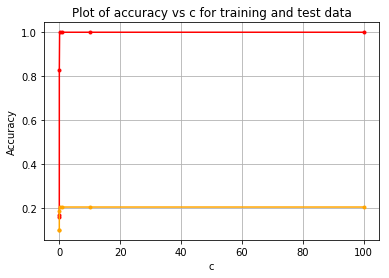

In [68]:
plt.plot(c_svm_linear, acc_train_svm_linear,'.-',color='red')
plt.plot(c_svm_linear, acc_test_svm_linear,'.-',color='orange')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.title("Plot of accuracy vs c for training and test data")
plt.grid()

## Observations

### Significance of C
* C is a regularization parameter that controls the trade off between the achieving a low training error and a low testing error that is the ability to generalize your classifier to unseen data.

### Best Model
* Linear SVM with C = 0.1 is the best model

### KNN vs SVM
* The accuracy of the KNN is better than Linear SVM model although the computation time for KNN is more than SVM 